In [4]:
# Wearable Sleep Data Analysis Starter
import pandas as pd
import matplotlib.pyplot as plt

# Load your WHOOP sleeps.csv file
df = pd.read_csv('/Users/briannarawlings/wearable_sleep_analysis/data/sleeps.csv')

# See what the data looks like
print(df.head())
print(df.columns)


      Cycle start time       Cycle end time Cycle timezone  \
0  2025-07-07 01:33:54                  NaN      UTC-05:00   
1  2025-07-06 00:23:23  2025-07-07 01:33:54      UTC-05:00   
2  2025-07-05 01:37:55  2025-07-06 00:23:23      UTC-05:00   
3  2025-07-04 00:21:53  2025-07-05 01:37:55      UTC-05:00   
4  2025-07-02 23:32:18  2025-07-04 00:21:53      UTC-05:00   

           Sleep onset           Wake onset  Sleep performance %  \
0  2025-07-07 01:33:54  2025-07-07 04:47:55                   37   
1  2025-07-06 00:23:23  2025-07-06 07:32:24                   82   
2  2025-07-05 01:37:55  2025-07-05 08:35:56                   73   
3  2025-07-04 00:21:53  2025-07-04 07:26:24                   77   
4  2025-07-02 23:32:18  2025-07-03 07:18:49                   79   

   Respiratory rate (rpm)  Asleep duration (min)  In bed duration (min)  \
0                    16.8                    186                    194   
1                    17.1                    403                    

From your output, your relevant columns look like:

Sleep onset or Cycle start time — your sleep date/time

Asleep duration (min) — total sleep

REM duration (min) — REM sleep

Deep (SWS) duration (min) — deep sleep

Light sleep duration (min) — light sleep

Sleep performance % or Sleep efficiency % — great for insights!

Maybe Sleep debt (min) and Sleep need (min) — interesting too

In [5]:
# 1) Rename columns for simplicity
df = df.rename(columns={
    'Cycle start time': 'date',
    'Asleep duration (min)': 'asleep_min',
    'Light sleep duration (min)': 'light_min',
    'Deep (SWS) duration (min)': 'deep_min',
    'REM duration (min)': 'rem_min',
    'Sleep performance %': 'sleep_perf'
})

# 2) Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# 3) Sort by date
df = df.sort_values('date')

# 4) Convert minutes to hours (optional — looks nicer in graphs)
df['asleep_hr'] = df['asleep_min'] / 60
df['light_hr'] = df['light_min'] / 60
df['deep_hr'] = df['deep_min'] / 60
df['rem_hr'] = df['rem_min'] / 60

# Preview cleaned data
print(df[['date', 'asleep_hr', 'light_hr', 'deep_hr', 'rem_hr', 'sleep_perf']].head())


                  date  asleep_hr  light_hr   deep_hr    rem_hr  sleep_perf
55 2025-05-18 01:55:55   6.416667  2.633333  1.633333  2.150000          83
54 2025-05-18 23:50:30   7.033333  4.100000  1.566667  1.366667          83
53 2025-05-20 00:02:02   6.233333  2.866667  2.333333  1.033333          80
52 2025-05-21 00:24:26   5.383333  2.650000  1.800000  0.933333          74
51 2025-05-21 00:24:26   0.450000  0.166667  0.283333  0.000000          27


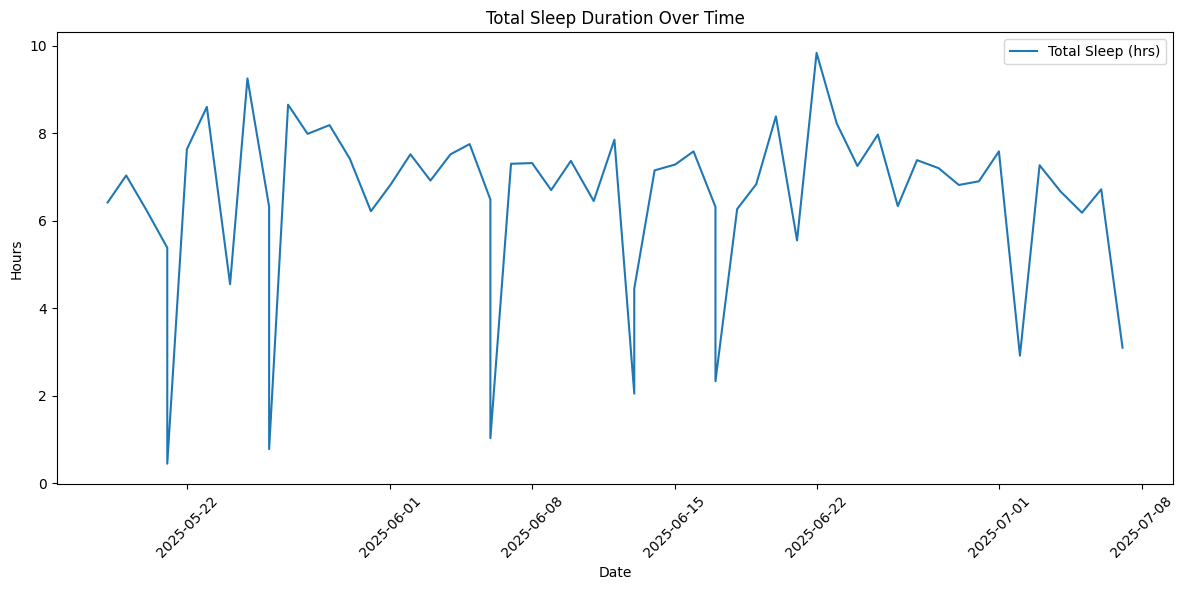

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['asleep_hr'], label='Total Sleep (hrs)')
plt.title('Total Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


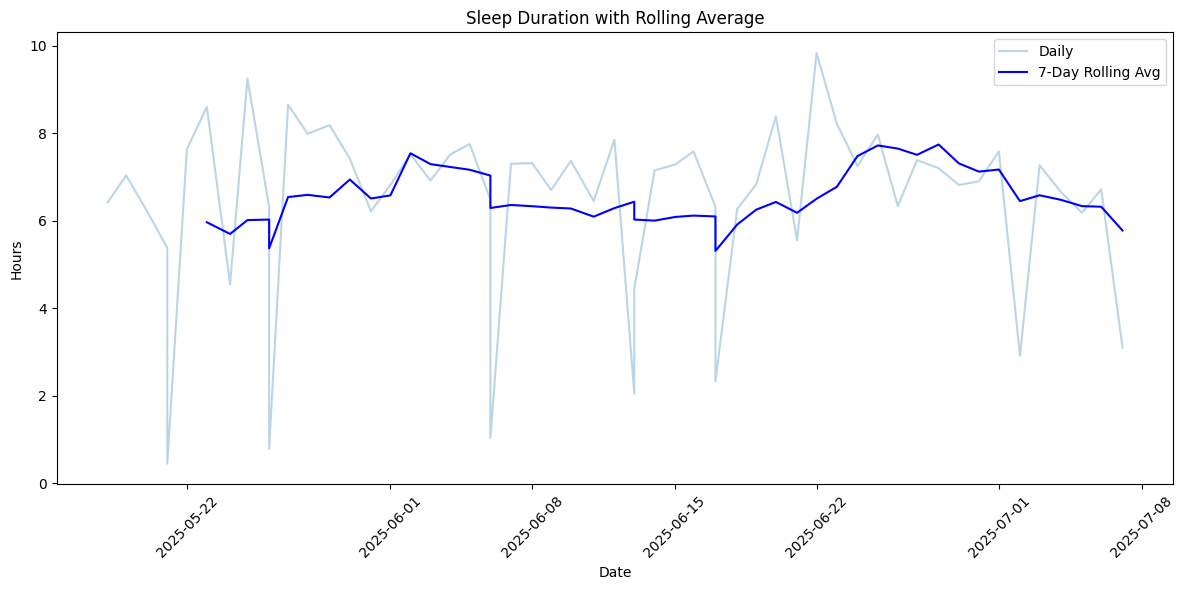

In [7]:
df['asleep_hr_roll7'] = df['asleep_hr'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['asleep_hr'], alpha=0.3, label='Daily')
plt.plot(df['date'], df['asleep_hr_roll7'], label='7-Day Rolling Avg', color='blue')
plt.title('Sleep Duration with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


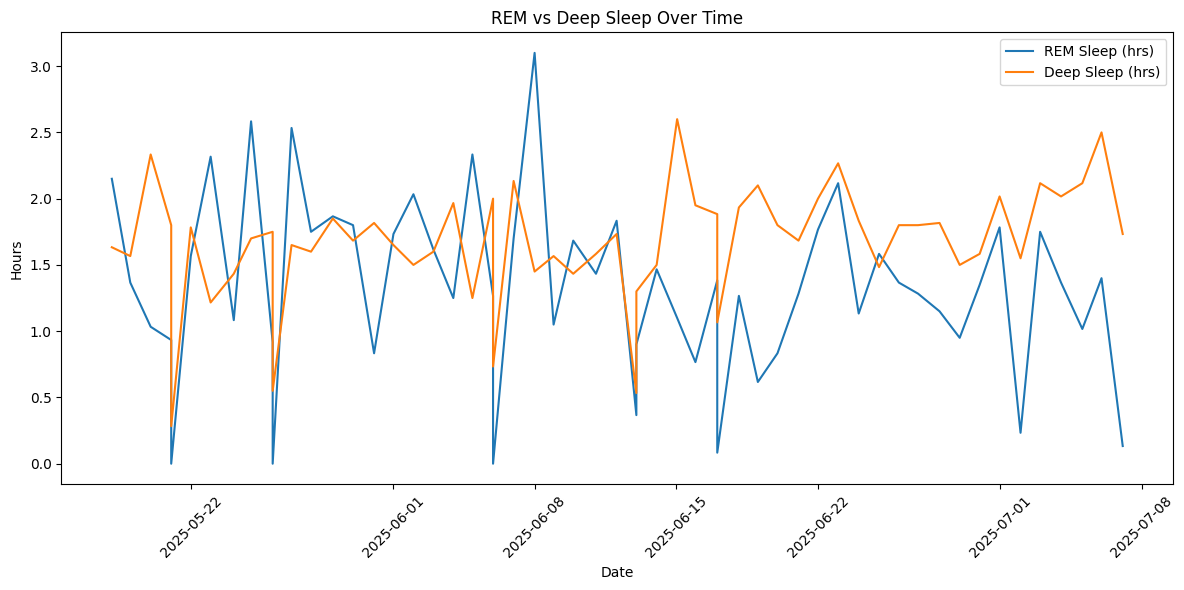

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['rem_hr'], label='REM Sleep (hrs)')
plt.plot(df['date'], df['deep_hr'], label='Deep Sleep (hrs)')
plt.title('REM vs Deep Sleep Over Time')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


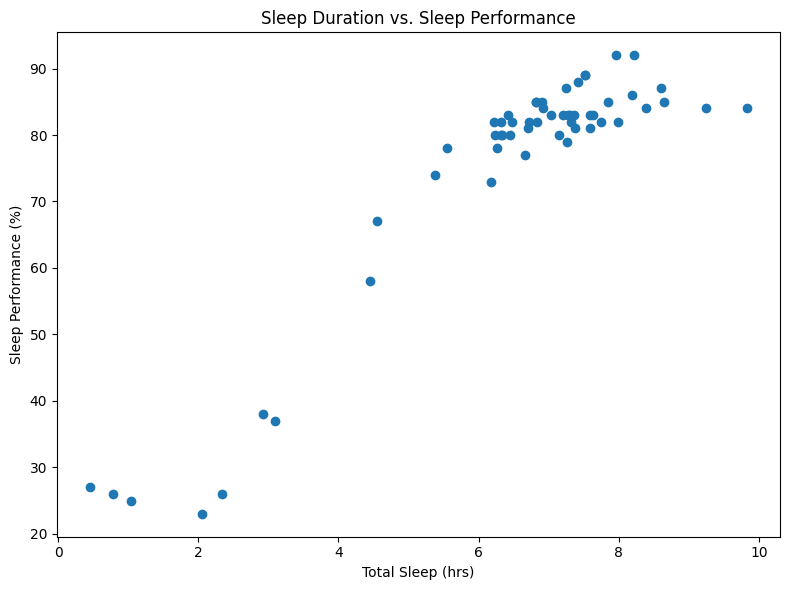

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['asleep_hr'], df['sleep_perf'])
plt.title('Sleep Duration vs. Sleep Performance')
plt.xlabel('Total Sleep (hrs)')
plt.ylabel('Sleep Performance (%)')
plt.tight_layout()
plt.show()


#3: How to combine your sleep, strain, and HRV data

In [11]:
import pandas as pd

# Load your workouts CSV
df_workouts = pd.read_csv('/Users/briannarawlings/wearable_sleep_analysis/data/workouts.csv')

# Convert Workout start time to datetime
df_workouts['Workout start time'] = pd.to_datetime(df_workouts['Workout start time'])

# Extract just the date
df_workouts['date'] = df_workouts['Workout start time'].dt.date

# Pick your strain metric
# You could use WHOOP's 'Activity Strain' or sum it with 'Energy burned (cal)' or duration

# Example: group by day
df_strain = df_workouts.groupby('date').agg({
    'Activity Strain': 'sum',
    'Energy burned (cal)': 'sum',
    'Duration (min)': 'sum'
}).reset_index()

# Rename for clarity
df_strain = df_strain.rename(columns={
    'Activity Strain': 'strain_score',
    'Energy burned (cal)': 'total_calories',
    'Duration (min)': 'total_minutes'
})

print(df_strain.head())

         date  strain_score  total_calories  total_minutes
0  2025-05-18          18.1           327.0             64
1  2025-05-19          14.2           266.0             68
2  2025-05-22          13.7           308.0             80
3  2025-05-23           6.7            80.0             23
4  2025-05-24           8.9            93.0             53


In [13]:
df_sleep = pd.read_csv('/Users/briannarawlings/wearable_sleep_analysis/data/sleeps.csv')
df_sleep['date'] = pd.to_datetime(df_sleep['Cycle start time']).dt.date

df_sleep = df_sleep.rename(columns={
    'Asleep duration (min)': 'asleep_min',
    'Deep (SWS) duration (min)': 'deep_min',
    'REM duration (min)': 'rem_min',
    'Sleep performance %': 'sleep_perf'
})

df_sleep['asleep_hr'] = df_sleep['asleep_min'] / 60


In [14]:
df_merged = pd.merge(df_sleep, df_strain, on='date', how='inner')

print(df_merged.head())

      Cycle start time       Cycle end time Cycle timezone  \
0  2025-07-05 01:37:55  2025-07-06 00:23:23      UTC-05:00   
1  2025-07-02 23:32:18  2025-07-04 00:21:53      UTC-05:00   
2  2025-07-02 00:17:47  2025-07-03 00:32:18      UTC-04:00   
3  2025-06-30 23:26:46  2025-07-02 00:17:47      UTC-04:00   
4  2025-06-26 22:39:10  2025-06-28 00:11:11      UTC-04:00   

           Sleep onset           Wake onset  sleep_perf  \
0  2025-07-05 01:37:55  2025-07-05 08:35:56          73   
1  2025-07-02 23:32:18  2025-07-03 07:18:49          79   
2  2025-07-02 00:17:47  2025-07-02 03:19:18          38   
3  2025-06-30 23:26:46  2025-07-01 08:13:47          83   
4  2025-06-26 22:39:10  2025-06-27 06:28:41          81   

   Respiratory rate (rpm)  asleep_min  In bed duration (min)  \
0                    17.0         371                    417   
1                    16.4         436                    460   
2                    15.5         175                    181   
3               

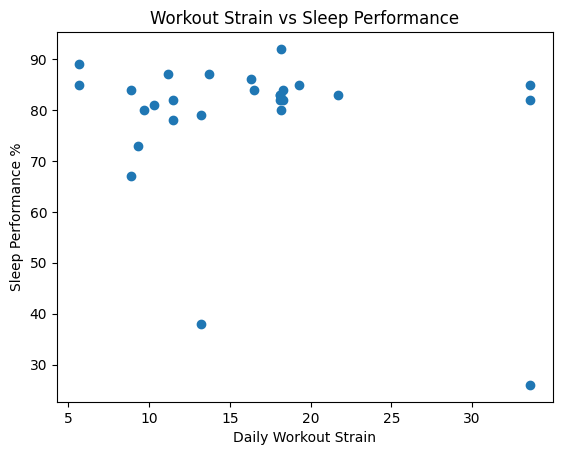

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['strain_score'], df_merged['sleep_perf'])
plt.xlabel('Daily Workout Strain')
plt.ylabel('Sleep Performance %')
plt.title('Workout Strain vs Sleep Performance')
plt.show()


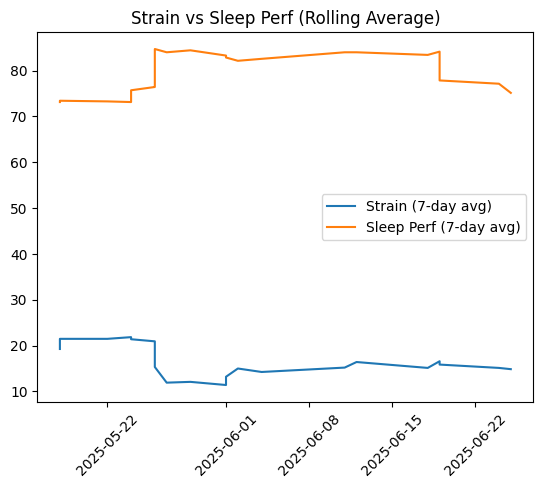

In [16]:
df_merged['strain_roll7'] = df_merged['strain_score'].rolling(window=7).mean()
df_merged['sleep_perf_roll7'] = df_merged['sleep_perf'].rolling(window=7).mean()

plt.plot(df_merged['date'], df_merged['strain_roll7'], label='Strain (7-day avg)')
plt.plot(df_merged['date'], df_merged['sleep_perf_roll7'], label='Sleep Perf (7-day avg)')
plt.legend()
plt.title('Strain vs Sleep Perf (Rolling Average)')
plt.xticks(rotation=45)
plt.show()


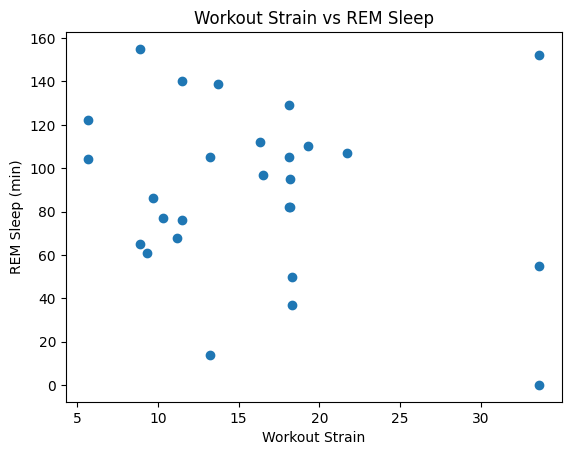

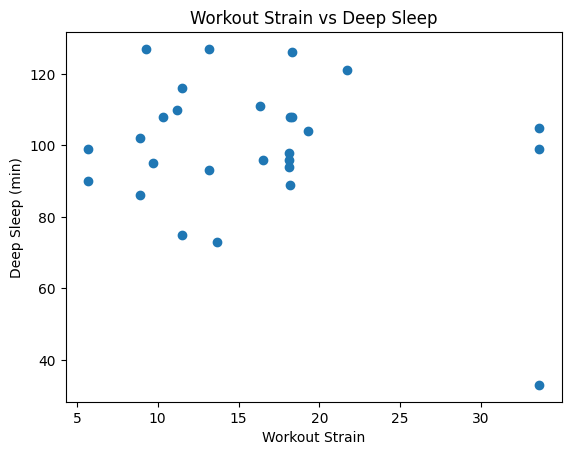

In [18]:
import matplotlib.pyplot as plt

# Scatter plot: Strain vs REM
plt.scatter(df_merged['strain_score'], df_merged['rem_min'])
plt.xlabel('Workout Strain')
plt.ylabel('REM Sleep (min)')
plt.title('Workout Strain vs REM Sleep')
plt.show()

# Scatter plot: Strain vs Deep Sleep
plt.scatter(df_merged['strain_score'], df_merged['deep_min'])
plt.xlabel('Workout Strain')
plt.ylabel('Deep Sleep (min)')
plt.title('Workout Strain vs Deep Sleep')
plt.show()


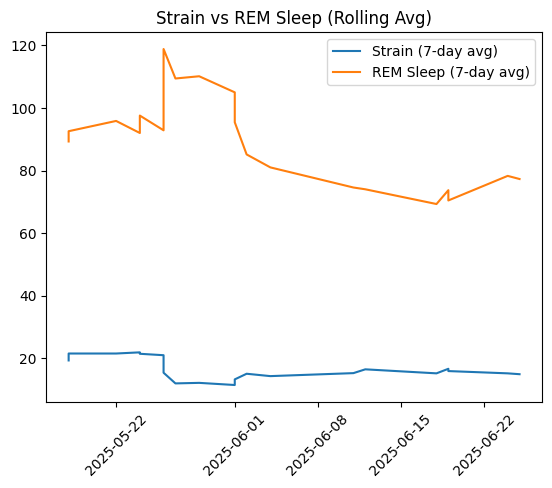

In [19]:
df_merged['rem_roll7'] = df_merged['rem_min'].rolling(window=7).mean()
df_merged['deep_roll7'] = df_merged['deep_min'].rolling(window=7).mean()

plt.plot(df_merged['date'], df_merged['strain_roll7'], label='Strain (7-day avg)')
plt.plot(df_merged['date'], df_merged['rem_roll7'], label='REM Sleep (7-day avg)')
plt.legend()
plt.title('Strain vs REM Sleep (Rolling Avg)')
plt.xticks(rotation=45)
plt.show()


          date  strain_score  hrv_next
51  2025-05-17           4.4     125.0
49  2025-05-18          11.7      86.0
50  2025-05-18          13.1     143.0
48  2025-05-20           7.1     110.0
47  2025-05-21           9.9     112.0


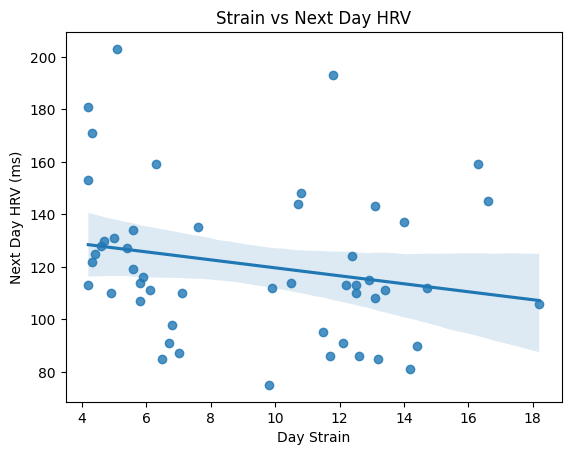

              strain_score  hrv_next
strain_score      1.000000 -0.215659
hrv_next         -0.215659  1.000000


In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your new file (skip if already loaded)
df = pd.read_csv('/Users/briannarawlings/wearable_sleep_analysis/data/physiological_cycles.csv')

# Rename for easier reference
df = df.rename(columns={
    'Heart rate variability (ms)': 'hrv',
    'Day Strain': 'strain_score'
})

# Extract date from 'Cycle start time' as datetime.date
df['date'] = pd.to_datetime(df['Cycle start time']).dt.date

# Sort by date
df = df.sort_values('date')

# Shift HRV to next day to align strain with next day HRV
df['hrv_next'] = df['hrv'].shift(-1)

# Drop rows with missing values
df_plot = df[['date', 'strain_score', 'hrv_next']].dropna()

print(df_plot.head())

# Plot the relationship
sns.regplot(data=df_plot, x='strain_score', y='hrv_next')
plt.xlabel('Day Strain')
plt.ylabel('Next Day HRV (ms)')
plt.title('Strain vs Next Day HRV')
plt.show()

# Show correlation coefficient
print(df_plot[['strain_score', 'hrv_next']].corr())




In [23]:
import numpy as np

# Ensure datetimes
df['Cycle start time'] = pd.to_datetime(df['Cycle start time'])
df['Cycle end time'] = pd.to_datetime(df['Cycle end time'])

# Create empty cycle_day
df['cycle_day'] = np.nan

# Drop rows without cycle end to define full windows
df_valid = df.dropna(subset=['Cycle end time'])

# For each cycle window, assign cycle day to all rows within that window
for index, row in df_valid.iterrows():
    cycle_start = row['Cycle start time']
    cycle_end = row['Cycle end time']
    
    mask = (df['Cycle start time'] >= cycle_start) & (df['Cycle start time'] <= cycle_end)
    df.loc[mask, 'cycle_day'] = (df.loc[mask, 'Cycle start time'] - cycle_start).dt.days + 1


In [24]:
df['phase'] = df['cycle_day'].apply(
    lambda x: 'Follicular' if pd.notnull(x) and x <= 14
    else 'Luteal' if pd.notnull(x)
    else np.nan
)



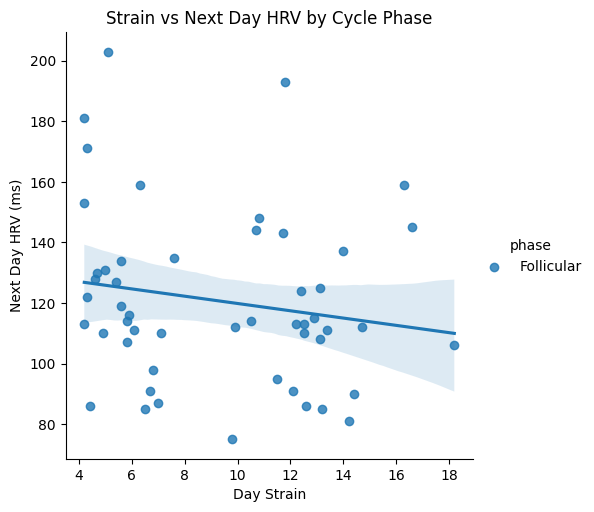

In [25]:
# Sort & shift HRV
df = df.sort_values('Cycle start time')
df['hrv_next'] = df['hrv'].shift(-1)

# Prepare final plot df
df_plot = df[['Cycle start time', 'strain_score', 'hrv_next', 'phase']].dropna()



# Plot by phase
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=df_plot, x='strain_score', y='hrv_next', hue='phase')
plt.xlabel('Day Strain')
plt.ylabel('Next Day HRV (ms)')
plt.title('Strain vs Next Day HRV by Cycle Phase')
plt.show()



Correlation Coefficients:
               strain_score  asleep_hr   rem_min  deep_min  sleep_perf
strain_score      1.000000  -0.201101 -0.196642 -0.240928   -0.243790
asleep_hr        -0.201101   1.000000  0.765274  0.460401    0.914833
rem_min          -0.196642   0.765274  1.000000  0.088758    0.682995
deep_min         -0.240928   0.460401  0.088758  1.000000    0.504019
sleep_perf       -0.243790   0.914833  0.682995  0.504019    1.000000


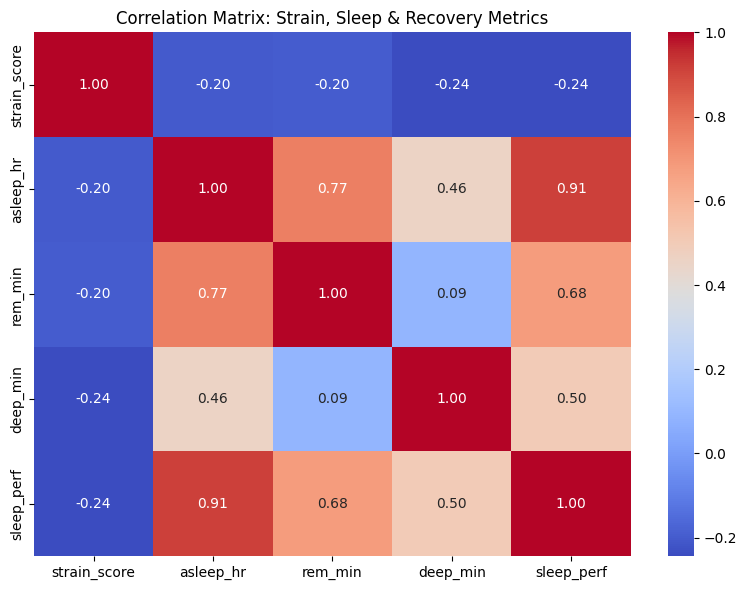

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use column names that exist in df_merged
corr_columns = ['strain_score', 'asleep_hr', 'rem_min', 'deep_min', 'sleep_perf']
corr_matrix = df_merged[corr_columns].corr()

# Print correlation values
print("Correlation Coefficients:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Strain, Sleep & Recovery Metrics')
plt.tight_layout()
plt.show()


Cycle Phase Distribution:
 phase
Follicular    53
Name: count, dtype: int64


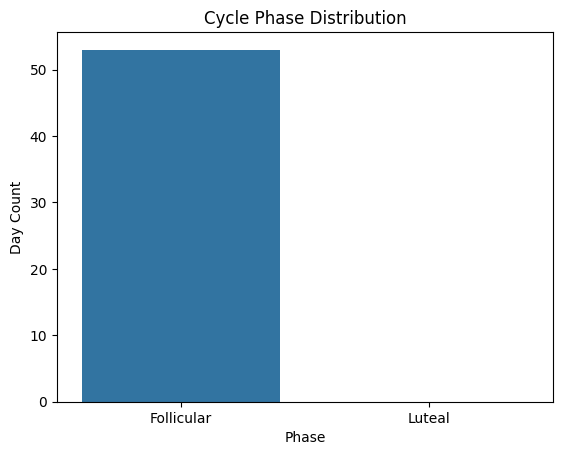

In [28]:
# Count records by phase
phase_counts = df['phase'].value_counts()
print("Cycle Phase Distribution:\n", phase_counts)

# Plot phase breakdown
sns.countplot(data=df, x='phase', order=['Follicular', 'Luteal'])
plt.title('Cycle Phase Distribution')
plt.xlabel('Phase')
plt.ylabel('Day Count')
plt.show()
